# Example of remote sensing and Python Opening Geospatial Images with Python
Go here
http://www.acgeospatial.co.uk/python-geospatial-workflows-prt1-anaconda/
<br>first time with Jupyter Notebooks? go here</br>
http://www.acgeospatial.co.uk/workflows-prt2-jupyter_notebooks/

Common imports...
<br>Matplotlib for plotting</br>
<br>gdal for image processing</br>
<br>numpy for arrays</br>

#### If you are following on from the first lunchtime webinar then you will need to install xarray

conda install -c conda-forge xarray

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt ### for plotting
from osgeo import gdal, gdal_array, ogr

import numpy as np

# Fake some data first

In [2]:
array2d = np.random.randint(25, size =(10,12))
print (array2d)

[[21 17  2 20 21 11 17  2  5 16 10 17]
 [23 17  7 16  9  4 20  5  8 21  2  6]
 [11 11 22 10 22  8  4  4  8 13 21 21]
 [18 21  6  3  5 21  1  9  4 17 19 16]
 [ 7 10  5  6  5  3 15  9  2  2  0  5]
 [ 7 19  0 10 13 18  9 10  4  7 19 24]
 [ 2  0  0 17  0  7 21  7 18 24  3  7]
 [23 13 12  8 19 13 10 14 19 10  6 24]
 [13  2 21 24 21  0 15  5 10  8  0  6]
 [19 10  2  4  1  5  7 15  9 13  9 21]]


# Plot that data!

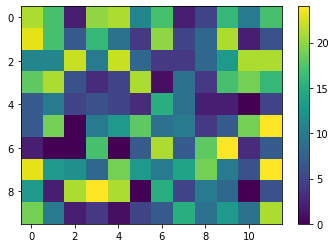

In [3]:
plt.imshow(array2d)
plt.colorbar()
plt.show()

# Manipulate the data
where the values are less than 10 set to 0 else leave as they were

In [4]:
b = np.where(array2d<10,0,array2d)
print (b)

[[21 17  0 20 21 11 17  0  0 16 10 17]
 [23 17  0 16  0  0 20  0  0 21  0  0]
 [11 11 22 10 22  0  0  0  0 13 21 21]
 [18 21  0  0  0 21  0  0  0 17 19 16]
 [ 0 10  0  0  0  0 15  0  0  0  0  0]
 [ 0 19  0 10 13 18  0 10  0  0 19 24]
 [ 0  0  0 17  0  0 21  0 18 24  0  0]
 [23 13 12  0 19 13 10 14 19 10  0 24]
 [13  0 21 24 21  0 15  0 10  0  0  0]
 [19 10  0  0  0  0  0 15  0 13  0 21]]


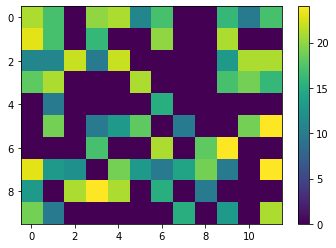

In [5]:
plt.imshow(b)
plt.colorbar()
plt.show()

In [6]:
c = np.where(b>=10,1,b)
print (c)

[[1 1 0 1 1 1 1 0 0 1 1 1]
 [1 1 0 1 0 0 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 1 1 1]
 [1 1 0 0 0 1 0 0 0 1 1 1]
 [0 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 1 1 0 1 0 0 1 1]
 [0 0 0 1 0 0 1 0 1 1 0 0]
 [1 1 1 0 1 1 1 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 0 0]
 [1 1 0 0 0 0 0 1 0 1 0 1]]


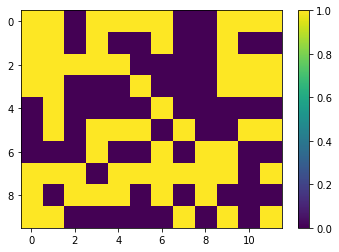

In [7]:
plt.imshow(c)
plt.colorbar()
plt.show()

# Another Way to consider

In [8]:
d = np.copy(array2d)
temp = np.less(d, 10)
np.putmask(d, temp, 0)
temp = np.greater_equal(d, 10)
np.putmask(d, temp, 1)
print (d)

[[1 1 0 1 1 1 1 0 0 1 1 1]
 [1 1 0 1 0 0 1 0 0 1 0 0]
 [1 1 1 1 1 0 0 0 0 1 1 1]
 [1 1 0 0 0 1 0 0 0 1 1 1]
 [0 1 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 1 1 1 0 1 0 0 1 1]
 [0 0 0 1 0 0 1 0 1 1 0 0]
 [1 1 1 0 1 1 1 1 1 1 0 1]
 [1 0 1 1 1 0 1 0 1 0 0 0]
 [1 1 0 0 0 0 0 1 0 1 0 1]]


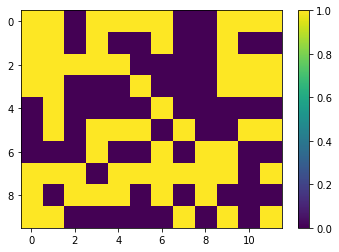

In [9]:
plt.imshow(d)
plt.colorbar()
plt.show()

In [10]:
print (array2d)

[[21 17  2 20 21 11 17  2  5 16 10 17]
 [23 17  7 16  9  4 20  5  8 21  2  6]
 [11 11 22 10 22  8  4  4  8 13 21 21]
 [18 21  6  3  5 21  1  9  4 17 19 16]
 [ 7 10  5  6  5  3 15  9  2  2  0  5]
 [ 7 19  0 10 13 18  9 10  4  7 19 24]
 [ 2  0  0 17  0  7 21  7 18 24  3  7]
 [23 13 12  8 19 13 10 14 19 10  6 24]
 [13  2 21 24 21  0 15  5 10  8  0  6]
 [19 10  2  4  1  5  7 15  9 13  9 21]]


# Useful things to know / get familiar with
What is the shape of my array?

In [11]:
print (array2d.shape)

(10, 12)


Remember when we ran this command array2d = np.random.randint(25, size =(10,12))
<br> the size parameter is the 'shape'</br>
<br> 3d array? </br>

In [12]:
array3d = np.random.randint(25, size =(10,12,3))

In [13]:
print (array3d.shape)

(10, 12, 3)


# Useful things to know / get familiar with
What is data type of my array?

In [14]:
print(array3d.dtype)

int32


# You can still plot a 3D array

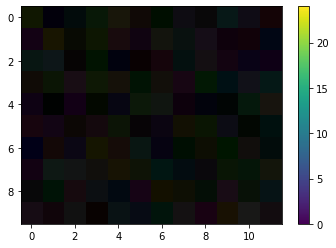

In [15]:
plt.imshow(array3d)
plt.colorbar()
plt.show()

### Perhaps more meaningful to to slice the data?

# Useful things to know / get familiar with
How to extract a 2d slice from a 3d array?

In [16]:
print(array3d[:,:,0])
print ()
print (array3d[:,:,1])
print ()
print (array3d[:,:,2])

[[16  2  2  8 24 16  0 14  9  7 15 20]
 [19 24  8 13 24 16 19  9 21 14 17  1]
 [ 8 13  6  1  1  9 21  4 20 19  9 14]
 [16 11 24 14 21  1 18 23  2  0 17  5]
 [14  0 18  3  7 12 16 13  2  1  5 23]
 [23 18 12 20 12  7 11 18 10 12  2  0]
 [ 1 19 11 21 21  9  6  0 13  0 17  2]
 [18 14 18 17 23 14  1  3 10  9  5 19]
 [ 8  0 22 12  2 22 19 14  4 24  8  6]
 [22 16 17  8  9  7  1 20 24 24 24 18]]

[[23  0 11 24 22  9 14 12  8 24 12  4]
 [ 2 21 10 22 11  4 20 17 13  1  2  6]
 [22 22  4 19  2  1  5 16 15  4  3  0]
 [11 21 13 24 17 19 15  6 24 16 17 24]
 [ 2  2  0  8  6 24 21  1  3  5 24 20]
 [ 5  5  7  9 20  4  5 16 21 12  7 16]
 [ 0  8  7 21 12 22  3 14 14 21 14 12]
 [ 2 24 20 15 19 19 22 12  8 21 21 21]
 [ 8 19 10 15  9  4 16 15 14 12 17 19]
 [12  5 17  2 18 11 20 17  2 17 24 12]]

[[ 1 11 11  7 10  6  0 18  9 23 21  6]
 [20  1  3  2 13 17 13 15 23 12  9 20]
 [18 24  4  1 14  2 11 15 18 17 22 21]
 [ 6  5 20  5  9  4 10 19  4 20 24 22]
 [19  1 21  0 18  9 16 12 12  4 12 14]
 [14 20  5 13  6  6 1

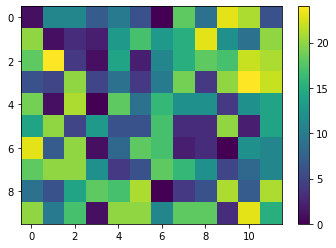

In [17]:
plt.imshow(array3d[:,:,2])
plt.colorbar()
plt.show()

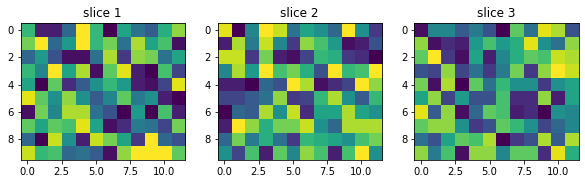

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 3, 1)
plt.title("slice 1")
plt.imshow(array3d[:,:,0])
plt.subplot(1, 3, 2)
plt.title("slice 2")
plt.imshow(array3d[:,:,1])
plt.subplot(1, 3, 3)
plt.title("slice 3")
plt.imshow(array3d[:,:,2])

learn more about array broadcasting here
https://machinelearningmastery.com/broadcasting-with-numpy-arrays/

# Opening images
gdal

In [19]:
!gdalinfo S2_may_South_coast_clip_int2.tif

Driver: GTiff/GeoTIFF
Files: S2_may_South_coast_clip_int2.tif
Size is 751, 519
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 30N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 30N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-3,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]

(519, 751)


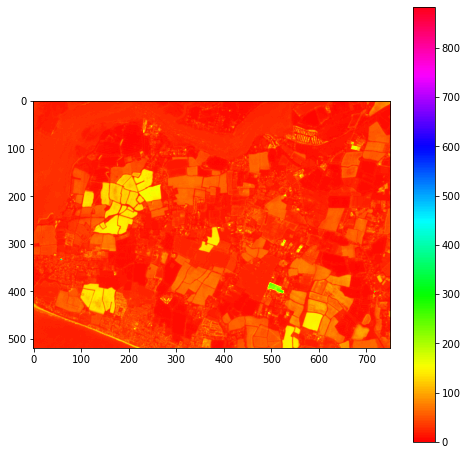

In [20]:
datain = "S2_may_South_coast_clip_int2.tif" 

raster_ds = gdal.Open(datain, gdal.GA_ReadOnly)
image_gdal = raster_ds.GetRasterBand(2).ReadAsArray() ## get the second band

print (image_gdal.shape)
plt.figure(figsize=(8,8))
plt.imshow(image_gdal, cmap='hsv')
plt.colorbar()
plt.show()

### This is only 1 band
##### Lets read all the bands in as a numpy array

In [21]:
datain = "S2_may_South_coast_clip_int2.tif"

img_ds = gdal.Open(datain, gdal.GA_ReadOnly)

img = np.zeros((img_ds.RasterYSize, img_ds.RasterXSize, img_ds.RasterCount),
               gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))


print (gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType))

print (img.shape)
print ("loading image into array")

## now loop over the empty array and populate it

print (img.shape[2])

for b in range(img.shape[2]):
    img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()
    
print (img.shape)





<class 'numpy.uint16'>
(519, 751, 13)
loading image into array
13
(519, 751, 13)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(519, 751, 3)


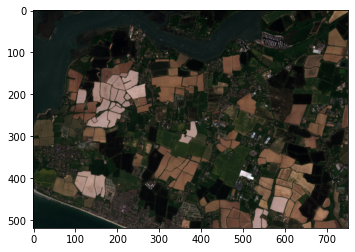

In [22]:
## Assigning red, green and blue

r = img[:, :, 3] = img_ds.GetRasterBand(4).ReadAsArray()
g = img[:, :, 2] = img_ds.GetRasterBand(3).ReadAsArray()
b = img[:, :, 1] = img_ds.GetRasterBand(2).ReadAsArray()

## stacking the data
rgb = np.stack([r, g, b],axis=2)
print (rgb.shape)
plt.imshow(rgb)
plt.show()

##Getting errors? consider this plt.imshow((out * 255).astype(np.uint8))

# Opening in Rasterio

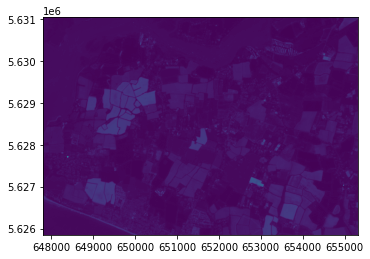

<AxesSubplot:>

In [23]:
import rasterio
from rasterio import plot
src = rasterio.open(r"S2_may_South_coast_clip_int2.tif")
plot.show((src, 2))

In [24]:
print (src.count)
array = src.read()
print (array.shape)

13
(13, 519, 751)


In [25]:
red = src.read(4)
green = src.read(3)
blue = src.read(2)
print (blue.shape)

(519, 751)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 519, 751)


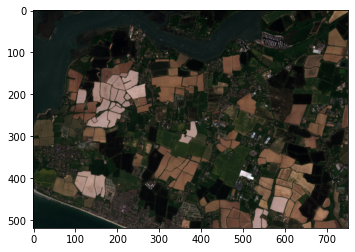

<AxesSubplot:>

In [26]:
rgb2 = np.stack([red, green, blue])
print (rgb2.shape)
plot.show(rgb2)

##Getting errors? consider this plt.imshow((out * 255).astype(np.uint8))

# COGs

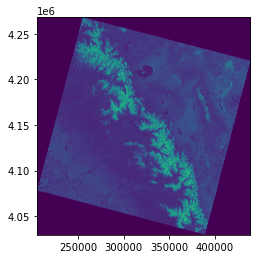

<AxesSubplot:>

In [27]:
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
src = rasterio.open(url)
plot.show(src)

# Xarray

In [28]:
import xarray as xr

In [29]:
url = 'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/30/U/XB/2020/7/S2B_30UXB_20200730_0_L2A/TCI.tif'
da = xr.open_rasterio(url)
da

<xarray.DataArray (band: 3, y: 10980, x: 10980)>
[361681200 values with dtype=uint8]
Coordinates:
  * band     (band) int32 1 2 3
  * y        (y) float64 5.7e+06 5.7e+06 5.7e+06 ... 5.59e+06 5.59e+06 5.59e+06
  * x        (x) float64 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05 7.098e+05
Attributes:
    transform:           (10.0, 0.0, 600000.0, 0.0, -10.0, 5700000.0)
    crs:                 +init=epsg:32630
    res:                 (10.0, 10.0)
    is_tiled:            1
    nodatavals:          (0.0, 0.0, 0.0)
    scales:              (1.0, 1.0, 1.0)
    offsets:             (0.0, 0.0, 0.0)
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE

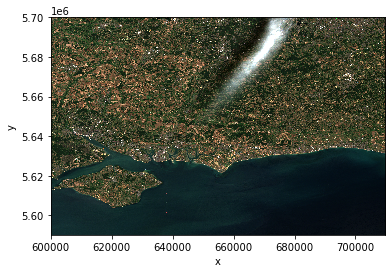

In [30]:
da.astype("int").plot.imshow(rgb="band")